In [1]:
import pandas as pd
from io import StringIO

csv_data = '''
        A,B,C,D
        1.0,2.0,3.0,4.0
        5.0,6.0,,8.0
        10.0,11.0,12.0,
        '''

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### 欠損値を持つ訓練データ

In [2]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [3]:
df.isnull().sum()

        A    0
B            0
C            1
D            1
dtype: int64

In [4]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
df.dropna(how='all')  #全てがNaNのものを落とす

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


### 欠測値を補完する

In [7]:
import numpy as np
np.nan

nan

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
type(df.values)

numpy.ndarray

In [10]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [11]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [12]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### カテゴリデータのエンコーディング

In [13]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [14]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [15]:
import numpy as np
class_mapping = { label : idx for idx, label in 
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [16]:
print(df['classlabel'])
print(df['classlabel'].values)

print(np.unique(df['classlabel']))
print(np.unique(df['classlabel'].values))

0    class2
1    class1
2    class2
Name: classlabel, dtype: object
['class2' 'class1' 'class2']
['class1' 'class2']
['class1' 'class2']


In [17]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [18]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [19]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [20]:
df[['color', 'size', 'price']].values

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [21]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1,1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [22]:
from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
print(X)

c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1,2])
])

c_transf.fit_transform(X).astype(float)

[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [23]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [24]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


### データセットを分割する

In [25]:
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [26]:
df_wine.columns = [
    'Class label',
    'Alchol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavnoids',
    'Nonflavanoid phenols',
    'Proanthocyanis',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
  ]
print(np.unique(df_wine['Class label']))
df_wine.head()

[1 2 3]


,Class label,Alchol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavnoids,Nonflavanoid phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [35]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## 特徴量のスケーリング

自前で標準化する場合：

In [28]:
ex = np.array([num for num in range(0,6)])
print( (ex - ex.mean())/ex.std())

[-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


ライブラリを使う場合：

In [29]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### L1正則化
L1正則化ロジスティック回帰を使って、トレーニングを行ってみる。

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Training accuracy', lr.score(X_train_std, y_train))
print('Test accuracy', lr.score(X_test_std, y_test))

Training accuracy 1.0
Test accuracy 1.0


$w_0$（切片、バイアスパラメーター）の表示：

In [36]:
lr.intercept_

array([-1.26305496, -1.21538801, -2.3701331 ])

$w_i$（重みパラメーター）の表示：

In [37]:
lr.coef_

array([[ 1.24527349,  0.18046854,  0.74253781, -1.15967373,  0.        ,
         0.        ,  1.17355027,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54262513,  2.51102531],
       [-1.53869497, -0.3864218 , -0.99617472,  0.36501372, -0.05927914,
         0.        ,  0.66783746,  0.        ,  0.        , -1.93300679,
         1.23511662,  0.        , -2.23005163],
       [ 0.13546172,  0.16982777,  0.35757093,  0.        ,  0.        ,
         0.        , -2.43404971,  0.        ,  0.        ,  1.56284663,
        -0.81779575, -0.49609863,  0.        ]])

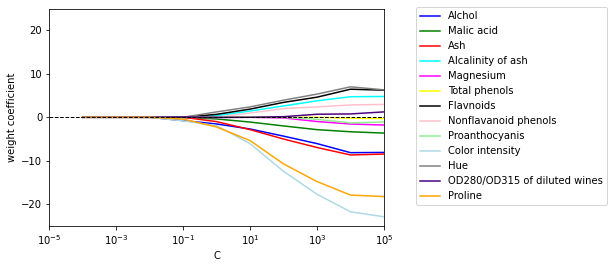

In [44]:
import matplotlib.pyplot as plt

fit = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []

for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
    
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlim([10**(-5), 10**5])
plt.ylim([-25,25])

plt.ylabel('weight coefficient')
plt.xlabel('C')

plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

plt.show()

## 逐次特徴量選択アルゴリズム

In [75]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state = self.random_state)
        
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)

            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            
            dim -= 1
            
            self.scores_.append(scores[best])
        
        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]
    
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        
        score = self.scoring(y_test, y_pred)
        return score

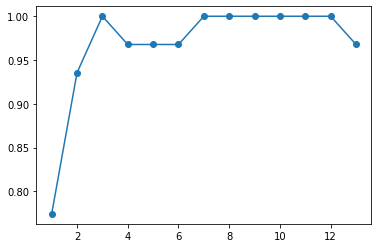

In [78]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.show()

## ランダムフォレストで特徴量の重要性を理解する

1 30 Proline 0.18545260453273973
2 30 Flavnoids 0.17475097557788732
3 30 Color intensity 0.14391990337231414
4 30 OD280/OD315 of diluted wines 0.1361619442214559
5 30 Alchol 0.11852941731789315
6 30 Hue 0.05873899628096849
7 30 Total phenols 0.05087242613744542
8 30 Magnesium 0.03135708460816904
9 30 Malic acid 0.025648355564265708
10 30 Proanthocyanis 0.02556987901932914
11 30 Alcalinity of ash 0.0223659419376885
12 30 Nonflavanoid phenols 0.013353928195970421
13 30 Ash 0.013278543233872913


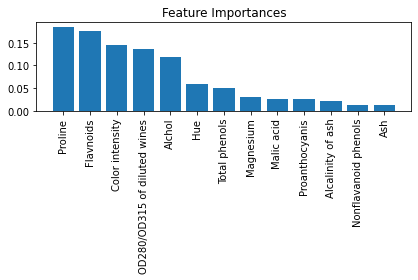

In [82]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print(f+1, 30, feat_labels[indices[f]], importances[indices[f]])

plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()